In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from AltCoins_Fonctions import extraction_part_dataset
%matplotlib inline

Importation du fichier mergé

In [0]:
file_link = "https://github.com/ghassenabdedayem/AltCoins/tree/master/data_sources/df_global_final.csv"

df_global_final = pd.read_csv(file_link, sep=',')

df_global_final.head()

,GOLD_Time,GOLD_USD_AM,GOLD_USD_PM,GOLD_GBP_AM,GOLD_GBP_PM,GOLD_EUR_AM,GOLD_EUR_PM,BTC_Open,BTC_High,BTC_Low,...,IBM_Low,IBM_Close,IBM_Volume,GGTrends_values,Day_Cos,Day_Sin,Month_Cos,Month_Sin,Quarter_Cos,Quarter_Sin
0,2019-11-30,1456.0,1460.0,1129.55,1131.32,1323.24,1327.42,7764,7836,7515,...,134.45,134.45,0.0,8.928571,0.623490,-0.781831,0.866025,-0.5,1.0,-2.449294e-16
1,2019-11-29,1456.0,1460.0,1129.55,1131.32,1323.24,1327.42,7466,7781,7460,...,133.04,134.45,773921.0,9.464286,-0.222521,-0.974928,0.866025,-0.5,1.0,-2.449294e-16
2,2019-11-28,1458.0,1455.0,1127.27,1127.35,1323.60,1321.84,7536,7730,7454,...,133.76,133.76,0.0,10.714286,-0.900969,-0.433884,0.866025,-0.5,1.0,-2.449294e-16
3,2019-11-27,1459.8,1454.0,1134.12,1129.74,1326.23,1322.30,7220,7619,6974,...,133.63,133.76,0.0,11.428571,-0.900969,0.433884,0.866025,-0.5,1.0,-2.449294e-16
4,2019-11-26,1458.0,1455.0,1133.76,1131.86,1322.96,1321.11,7145,7320,7098,...,134.77,135.03,0.0,11.785714,-0.222521,0.974928,0.866025,-0.5,1.0,-2.449294e-16


In [0]:
file_link = "https://github.com/ghassenabdedayem/AltCoins/tree/master/data_sources/df_variation.csv"

df_variation = pd.read_csv(file_link, sep=',')

df_variation.head()

,GOLD_Time,GOLD_USD_AM,GOLD_USD_PM,GOLD_GBP_AM,GOLD_GBP_PM,GOLD_EUR_AM,GOLD_EUR_PM,BTC_Open,BTC_High,BTC_Low,...,IBM_Low,IBM_Close,IBM_Volume,GGTrends_values,Day_Cos,Day_Sin,Month_Cos,Month_Sin,Quarter_Cos,Quarter_Sin
0,2019-11-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039914,0.007069,0.007373,...,0.010598,0.000000,0.0,-0.056604,0.623490,-0.781831,0.866025,-0.5,1.0,-2.449294e-16
1,2019-11-29,-0.001372,0.003436,0.002023,0.003522,-0.000272,0.004221,-0.009289,0.006598,0.000805,...,-0.005383,0.005158,773921.0,-0.116667,-0.222521,-0.974928,0.866025,-0.5,1.0,-2.449294e-16
2,2019-11-28,-0.001233,0.000688,-0.006040,-0.002116,-0.001983,-0.000348,0.043767,0.014569,0.068827,...,0.000973,0.000000,0.0,-0.062500,-0.900969,-0.433884,0.866025,-0.5,1.0,-2.449294e-16
3,2019-11-27,0.001235,-0.000687,0.000318,-0.001873,0.002472,0.000901,0.010497,0.040847,-0.017470,...,-0.008459,-0.009405,0.0,-0.030303,-0.900969,0.433884,0.866025,-0.5,1.0,-2.449294e-16
4,2019-11-26,-0.000685,-0.002331,0.000309,0.000902,-0.001788,-0.001693,0.015059,0.000137,0.072692,...,0.003126,-0.007059,0.0,-0.142857,-0.222521,0.974928,0.866025,-0.5,1.0,-2.449294e-16


In [0]:
# Creation d'un DataFrame à l'aide d'une liste de colonnes existantes
def Creation_Df_From_ListCol(df, liste_col):
    df2 = pd.DataFrame()
    
    df2['GOLD_Time'] = pd.to_datetime(df['GOLD_Time'])
    for col in liste_col:
        df2[col] = df[col]
        
    return df2

In [0]:
# Creation d'un DataFrame à l'aide d'une liste de trigrammes (récupère toutes les colonnes associées au trigramme)
def Creation_Df_From_ListTrigramme(df, liste_tri):
    df2 = pd.DataFrame()
    
    df2['GOLD_Time'] = pd.to_datetime(df['GOLD_Time'])
    for col in liste_tri:
        for col_ref in df.columns:
            if (col == col_ref[:len(col)]):
                df2[col_ref] = df[col_ref]
        
    return df2

In [0]:
liste_tri = ['BTC']
df_global_final_BTC = Creation_Df_From_ListTrigramme(df_global_final, liste_tri)

df_global_final_BTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 8 columns):
GOLD_Time         2530 non-null datetime64[ns]
BTC_Open          2530 non-null int64
BTC_High          2530 non-null int64
BTC_Low           2530 non-null int64
BTC_Close         2530 non-null int64
BTC_Volume        2530 non-null int64
BTC_Market_Cap    2530 non-null int64
BTC_Intraday      2530 non-null int64
dtypes: datetime64[ns](1), int64(7)
memory usage: 158.2 KB


In [0]:
df_global_final.head()

,GOLD_Time,GOLD_USD_AM,GOLD_USD_PM,GOLD_GBP_AM,GOLD_GBP_PM,GOLD_EUR_AM,GOLD_EUR_PM,BTC_Open,BTC_High,BTC_Low,...,IBM_Low,IBM_Close,IBM_Volume,GGTrends_values,Day_Cos,Day_Sin,Month_Cos,Month_Sin,Quarter_Cos,Quarter_Sin
0,2019-11-30,1456.0,1460.0,1129.55,1131.32,1323.24,1327.42,7764,7836,7515,...,134.45,134.45,0.0,8.928571,0.623490,-0.781831,0.866025,-0.5,1.0,-2.449294e-16
1,2019-11-29,1456.0,1460.0,1129.55,1131.32,1323.24,1327.42,7466,7781,7460,...,133.04,134.45,773921.0,9.464286,-0.222521,-0.974928,0.866025,-0.5,1.0,-2.449294e-16
2,2019-11-28,1458.0,1455.0,1127.27,1127.35,1323.60,1321.84,7536,7730,7454,...,133.76,133.76,0.0,10.714286,-0.900969,-0.433884,0.866025,-0.5,1.0,-2.449294e-16
3,2019-11-27,1459.8,1454.0,1134.12,1129.74,1326.23,1322.30,7220,7619,6974,...,133.63,133.76,0.0,11.428571,-0.900969,0.433884,0.866025,-0.5,1.0,-2.449294e-16
4,2019-11-26,1458.0,1455.0,1133.76,1131.86,1322.96,1321.11,7145,7320,7098,...,134.77,135.03,0.0,11.785714,-0.222521,0.974928,0.866025,-0.5,1.0,-2.449294e-16


In [0]:
liste_col = ['BTC_Close', 'ADA_Close', 'LTC_Close', 'EOS_Close', 'ETH_Close', 'BCH_Close', 'BNB_Close', 'BSV_Close', 'USDT_Close', 'XLM_Close', 'XRP_Close', 'XTZ_Close']
df_global_final_Cryptos = Creation_Df_From_ListCol(df_global_final, liste_col)

df_global_final_Cryptos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 13 columns):
GOLD_Time     2530 non-null datetime64[ns]
BTC_Close     2530 non-null int64
ADA_Close     2530 non-null float64
LTC_Close     2530 non-null float64
EOS_Close     2530 non-null float64
ETH_Close     2530 non-null int64
BCH_Close     2530 non-null int64
BNB_Close     2530 non-null float64
BSV_Close     2530 non-null float64
USDT_Close    2528 non-null float64
XLM_Close     2528 non-null float64
XRP_Close     2528 non-null float64
XTZ_Close     2530 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 257.1 KB


In [0]:
df_global_final_Cryptos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 13 columns):
GOLD_Time     2530 non-null datetime64[ns]
BTC_Close     2530 non-null int64
ADA_Close     2530 non-null float64
LTC_Close     2530 non-null float64
EOS_Close     2530 non-null float64
ETH_Close     2530 non-null int64
BCH_Close     2530 non-null int64
BNB_Close     2530 non-null float64
BSV_Close     2530 non-null float64
USDT_Close    2528 non-null float64
XLM_Close     2528 non-null float64
XRP_Close     2528 non-null float64
XTZ_Close     2530 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 257.1 KB


In [0]:
df_global_final_Cryptos.describe()

,BTC_Close,ADA_Close,LTC_Close,EOS_Close,ETH_Close,BCH_Close,BNB_Close,BSV_Close,USDT_Close,XLM_Close,XRP_Close,XTZ_Close
count,2530.000000,2530.000000,2530.000000,2530.000000,2530.000000,2530.000000,2530.000000,2530.000000,2528.000000,2528.000000,2528.000000,2530.000000
mean,2870.975889,0.044086,35.017953,1.687162,149.123715,217.037154,5.509759,18.004198,0.689196,1.171044,4.321312,0.489993
std,3733.359977,0.110473,52.200715,3.294507,216.409648,451.080485,9.131002,42.677982,0.461856,3.953110,20.864418,1.060038
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,320.500000,0.000000,3.260000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013227,0.001914,0.006372,0.000000
50%,652.000000,0.000000,5.290000,0.000000,13.000000,0.000000,0.000000,0.000000,1.000000,0.003364,0.013643,0.000000
75%,5228.750000,0.042780,54.530000,2.720000,236.000000,291.000000,9.550000,9.685000,1.000000,0.121414,0.310968,0.436661
max,19497.000000,1.110000,358.340000,21.540000,1396.000000,3923.000000,50.320000,238.340000,1.210000,26.790000,144.540000,6.070000


In [0]:
df_global_final_Cryptos_2018 = df_global_final_Cryptos.copy()

df_global_final_Cryptos_2 = extraction_part_dataset(df_global_final_Cryptos_2018, '01/01/2017', '12/31/2019')

df_global_final_Cryptos_2.info()

#df_global_final_Cryptos_2018[(df_global_final_Cryptos_2018['GOLD_Time'] >= date_debut) & (df_global_final_Cryptos_2018['GOLD_Time'] <= date_fin)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 1063
Data columns (total 13 columns):
GOLD_Time     1064 non-null datetime64[ns]
BTC_Close     1064 non-null int64
ADA_Close     1064 non-null float64
LTC_Close     1064 non-null float64
EOS_Close     1064 non-null float64
ETH_Close     1064 non-null int64
BCH_Close     1064 non-null int64
BNB_Close     1064 non-null float64
BSV_Close     1064 non-null float64
USDT_Close    1064 non-null float64
XLM_Close     1064 non-null float64
XRP_Close     1064 non-null float64
XTZ_Close     1064 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 116.4 KB


In [0]:
df_global_final_Cryptos_2018[(df_global_final_Cryptos_2018['GOLD_Time'] >= '11/01/2019')]

,GOLD_Time,BTC_Close,ADA_Close,LTC_Close,EOS_Close,ETH_Close,BCH_Close,BNB_Close,BSV_Close,USDT_Close,XLM_Close,XRP_Close,XTZ_Close
0,2019-11-30,7569,0.040425,47.48,2.76,152,218,15.72,107.68,1.00,0.059641,0.226474,1.330000
1,2019-11-29,7761,0.041423,48.88,2.80,155,224,16.27,109.52,1.00,0.059152,0.230217,1.310000
2,2019-11-28,7463,0.039190,47.06,2.64,151,218,15.68,106.34,1.00,0.058225,0.224570,1.280000
3,2019-11-27,7531,0.039049,48.01,2.69,153,220,16.10,107.86,1.01,0.059057,0.225081,1.260000
4,2019-11-26,7218,0.036993,47.27,2.63,148,212,15.53,107.79,1.01,0.058553,0.222145,1.240000
5,2019-11-25,7146,0.036048,45.83,2.54,146,209,15.27,104.54,1.00,0.057595,0.218622,1.240000
6,2019-11-24,7047,0.035588,44.73,2.45,142,205,15.28,100.41,1.02,0.056881,0.223184,1.340000
7,2019-11-23,7397,0.038343,48.71,2.72,153,217,16.42,109.24,1.01,0.060364,0.236188,1.390000
8,2019-11-22,7296,0.037148,47.62,2.63,150,208,15.58,96.95,1.00,0.059502,0.231600,1.220000
9,2019-11-21,7642,0.038406,50.88,2.83,161,226,16.84,100.26,1.00,0.061683,0.243766,1.210000


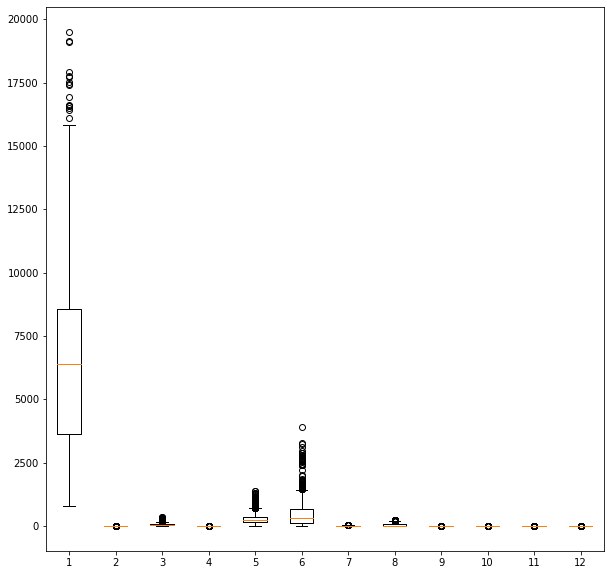

In [0]:
liste_plot = [df_variation.BTC_Close, \
              df_variation.ADA_Close, \
              df_variation.LTC_Close, \
              df_variation.EOS_Close, \
              df_variation.ETH_Close, \
              df_variation.BCH_Close, \
              df_variation.BNB_Close, \
              df_variation.BSV_Close, \
              df_variation.USDT_Close, \
              df_variation.XLM_Close, \
              df_variation.XRP_Close, \
              df_variation.XTZ_Close]

liste_plot = [df_global_final_Cryptos_2.BTC_Close, \
              df_global_final_Cryptos_2.ADA_Close, \
              df_global_final_Cryptos_2.LTC_Close, \
              df_global_final_Cryptos_2.EOS_Close, \
              df_global_final_Cryptos_2.ETH_Close, \
              df_global_final_Cryptos_2.BCH_Close, \
              df_global_final_Cryptos_2.BNB_Close, \
              df_global_final_Cryptos_2.BSV_Close, \
              df_global_final_Cryptos_2.USDT_Close, \
              df_global_final_Cryptos_2.XLM_Close, \
              df_global_final_Cryptos_2.XRP_Close, \
              df_global_final_Cryptos_2.XTZ_Close]

plt.figure(figsize = (10,10));
plt.boxplot(liste_plot)
#plt.boxplot(df_variation_BTC.BTC_Close)
#plt.xticks(['BTC_Close', 'ADA_Close'])
plt.show()

In [0]:
df_global_final_Cryptos_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 1063
Data columns (total 13 columns):
GOLD_Time     1064 non-null datetime64[ns]
BTC_Close     1064 non-null int64
ADA_Close     1064 non-null float64
LTC_Close     1064 non-null float64
EOS_Close     1064 non-null float64
ETH_Close     1064 non-null int64
BCH_Close     1064 non-null int64
BNB_Close     1064 non-null float64
BSV_Close     1064 non-null float64
USDT_Close    1064 non-null float64
XLM_Close     1064 non-null float64
XRP_Close     1064 non-null float64
XTZ_Close     1064 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 116.4 KB


I:\PYTHON\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


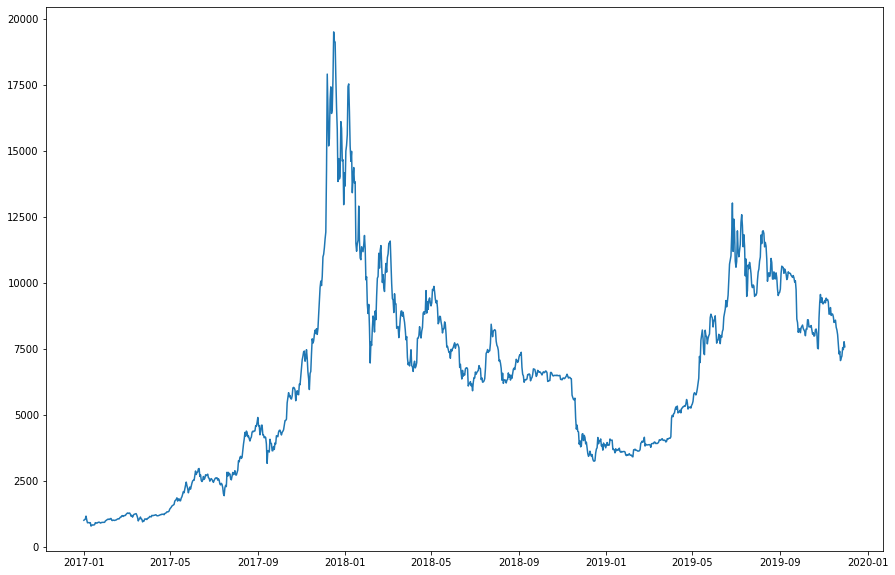

In [0]:
plt.figure(figsize = (15,10));
plt.plot(df_global_final_Cryptos_2.GOLD_Time, df_global_final_Cryptos_2.BTC_Close);

In [0]:
cryptos = ['ADA', 'BTC', 'LTC', 'EOS', 'ETH', 'BCH', 'BNB', 'BSV', 'USDT', 'XLM', 'XRP', 'XTZ']

def show_multi_charts(dfs):
    fig = plt.figure(figsize=(23,17))
    i = 0
    ax = {}
    for crypt in cryptos:
        i += 1
        ax[i] = fig.add_subplot(4,3,i)
        col_Close = crypt + '_Close'
        m = ax[i].plot(dfs.GOLD_Time, dfs[col_Close])
        t = ax[i].set_title(crypt)
    plt.show()

In [0]:
def show_multi_charts_box(dfs):
    fig = plt.figure(figsize=(23,17))
    i = 0
    ax = {}
    for crypt in cryptos:
        i += 1
        ax[i] = fig.add_subplot(4,3,i)
        col_Close = crypt + '_Close'
        m = ax[i].boxplot(dfs[col_Close])
        t = ax[i].set_title(crypt)
    plt.show()

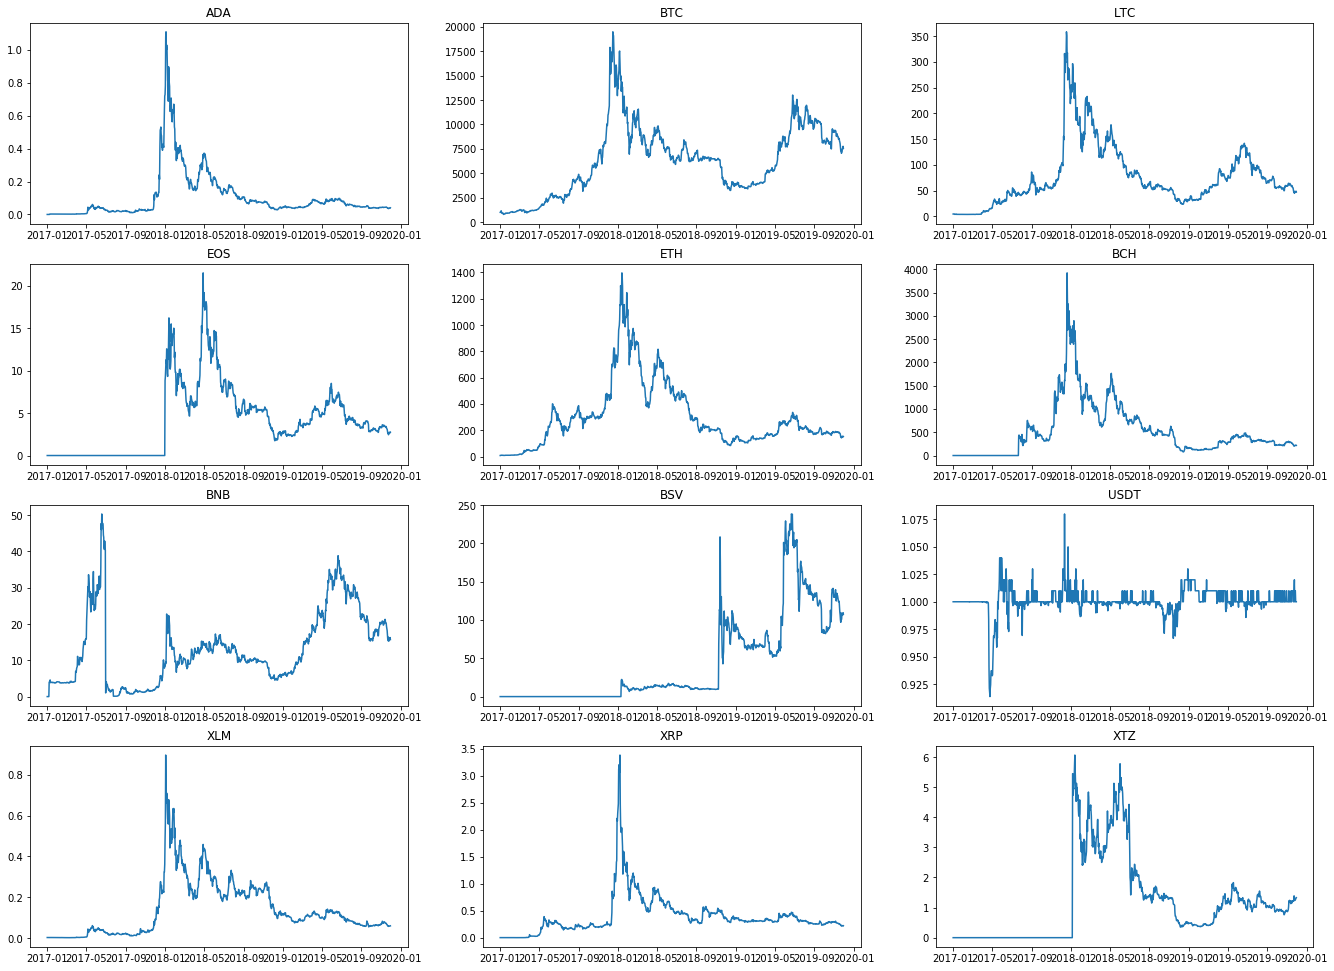

In [0]:
show_multi_charts(df_global_final_Cryptos_2)
plt.show()

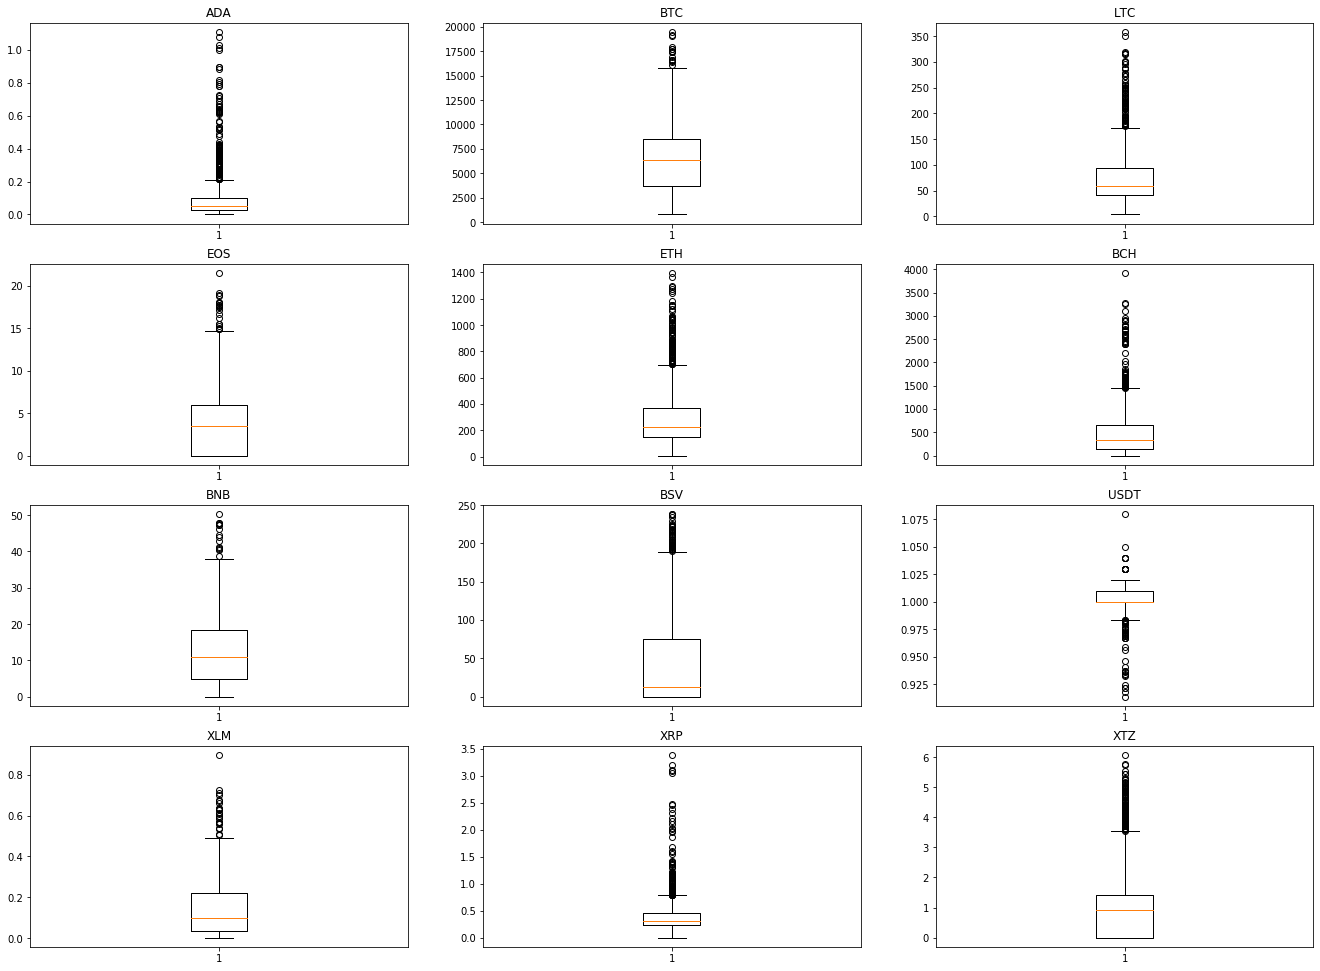

In [0]:
show_multi_charts_box(df_global_final_Cryptos_2)
plt.show()

In [0]:
df_global_final_Cryptos_2.describe()

,BTC_Close,ADA_Close,LTC_Close,EOS_Close,ETH_Close,BCH_Close,BNB_Close,BSV_Close,USDT_Close,XLM_Close,XRP_Close,XTZ_Close
count,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000
mean,6296.049812,0.104828,76.097350,4.011767,300.514098,516.075188,13.101213,42.810733,1.001038,0.137677,0.398679,1.165116
std,3580.470109,0.150539,59.324705,4.060523,247.346364,574.121902,9.940242,57.187066,0.012208,0.135121,0.375546,1.373329
min,777.000000,0.000000,3.710000,0.000000,8.000000,0.000000,0.000000,0.000000,0.913595,0.001724,0.005408,0.000000
25%,3649.500000,0.028521,42.207500,0.000000,149.000000,132.000000,4.855000,0.000000,0.999495,0.034889,0.233380,0.000000
50%,6406.500000,0.049153,59.000000,3.525000,222.000000,330.000000,10.785000,12.085000,1.000000,0.097886,0.311197,0.903614
75%,8553.500000,0.102256,94.670000,5.902500,370.000000,660.500000,18.440000,75.635000,1.010000,0.221499,0.456002,1.420000
max,19497.000000,1.110000,358.340000,21.540000,1396.000000,3923.000000,50.320000,238.340000,1.080000,0.896227,3.380000,6.070000
